In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for num_epochs epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('Error')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    ax_2.set_xlabel('Accuracy')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
import sys
# sys.path.append('/path/to/mlpractical')
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(NpzFile '/Users/ycy/PycharmProjects/mlpractical/data/emnist-train.npz' with keys: inputs, targets)
KeysView(NpzFile '/Users/ycy/PycharmProjects/mlpractical/data/emnist-valid.npz' with keys: inputs, targets)


In [8]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

%pip install tqdm

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

train_data.reset()
valid_data.reset()

# Setup hyperparameters
learning_rate = 9e-4
num_epochs = 3
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128

final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []
stats_list = []
keys_list = []

for i in range(3):
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    
    # Create model with ONE hidden layer
    if i == 0:
        model = MultipleLayerModel([
            AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # hidden layer
            ReluLayer(),
            AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
        ])
    elif i == 1:
        model = MultipleLayerModel([
            AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # hidden layer
            ReluLayer(),
            AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # output layer
            ReluLayer(),
            AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
        ])
    else:
        model = MultipleLayerModel([
            AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # hidden layer
            ReluLayer(),
            AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # output layer
            ReluLayer(),
            AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # output layer
            ReluLayer(),
            AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
        ])
    
    error = CrossEntropySoftmaxError()
    # Use a Adam learning rule
    learning_rule = AdamLearningRule(learning_rate=learning_rate)
    
    # Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    
    stats_list.append(stats)
    keys_list.append(keys)
    print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
    print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
    print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
    print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
    print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


KeyboardInterrupt: 

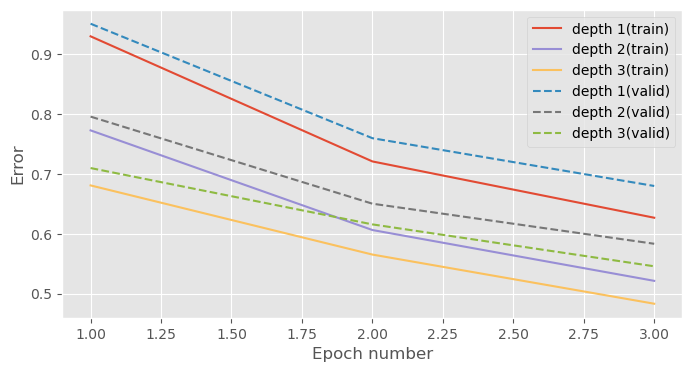

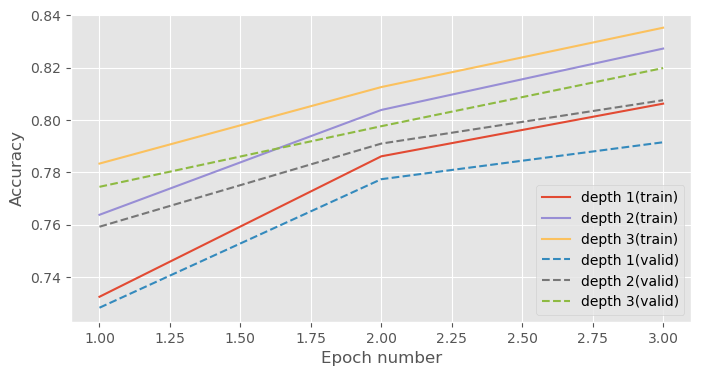

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plot_training_stats_layers(stats_list, keys_list, stats_interval):
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)

    lines_1 = []
    labels_1 = []
    lines_2 = []
    labels_2 = []

    for i in range(len(stats_list)):
        stats = stats_list[i]
        keys = keys_list[i]
        
        for k in ['error(train)', 'error(valid)']:
            if k == 'error(train)':
                label = f'depth {i+1}(train)'
                style = '-' 
            else:
                label = f'depth {i+1}(valid)'
                style = '--' 
            
            line, = ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                              stats[1:, keys[k]], label=label, linestyle=style)
            lines_1.append(line)
            labels_1.append(label)
        
        ax_1.set_xlabel('Epoch number')
        ax_1.set_ylabel('Error')

        for k in ['acc(train)', 'acc(valid)']:
            if k == 'acc(train)':
                label = f'depth {i+1}(train)'
                style = '-'  # 实线
            else:
                label = f'depth {i+1}(valid)'
                style = '--'  # 虚线
            
            line, = ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                              stats[1:, keys[k]], label=label, linestyle=style)
            lines_2.append(line)
            labels_2.append(label)
        
        ax_2.set_xlabel('Epoch number')
        ax_2.set_ylabel('Accuracy')

    ax_1.legend([lines_1[0], lines_1[2], lines_1[4], lines_1[1], lines_1[3], lines_1[5]],
                [labels_1[0], labels_1[2], labels_1[4], labels_1[1], labels_1[3], labels_1[5]])

    ax_2.legend([lines_2[0], lines_2[2], lines_2[4], lines_2[1], lines_2[3], lines_2[5]],
                [labels_2[0], labels_2[2], labels_2[4], labels_2[1], labels_2[3], labels_2[5]])

    plt.show()
    fig_1.savefig('../outputs/task1-2-error.pdf')
    fig_2.savefig('../outputs/task1-2-accuracy.pdf')

plot_training_stats_layers(stats_list, keys_list, stats_interval)


In [32]:
print('| Hidden Layers | final error(train) | final error(valid) | final acc(train) | final acc(valid) |')
print('|------------|--------------------|--------------------|------------------|------------------|')
for j in range(3):
    print('| {0}        | {1:.2e}           | {2:.2e}           |  {3:.2f}            | {4:.2f}             |'
          .format(j + 1,
                  final_errors_train[j], final_errors_valid[j],
                  final_accs_train[j], final_accs_valid[j]))

| hidden_dim | final error(train) | final error(valid) | final acc(train) | final acc(valid) |
|------------|--------------------|--------------------|------------------|------------------|
| 32        | 5.58e-01           | 6.94e-01           |  0.82            | 0.79             |
| 64        | 3.33e-01           | 6.75e-01           |  0.88            | 0.80             |
| 128        | 1.64e-01           | 9.32e-01           |  0.94            | 0.81             |
